# Link checking scripts:
modified from source: https://dev.to/arvindmehairjan/build-a-web-crawler-to-check-for-broken-links-with-python-beautifulsoup-39mg

modified by Poppy Nicolette Riddle 2021
would be cool to make this into a dashboard

Currently - this tool is working! However, it is skipping JS loaded pages, which might not be the info we want anyway?

- [ ] use requests-html to find items for JS loaded pages:https://pypi.org/project/requests-html/
- [ ] this is also a good reference for crawling entire LibGuide: https://www.thepythoncode.com/article/extract-all-website-links-python
- [ ] OH! and what if we made this accessible by making a chrome plugin that runs serverless: https://pythonspot.com/create-a-chrome-plugin-with-python/


## import libraries
seaborn and matplot lib were added just in case you want to make it look good. go on...

In [2]:
from bs4 import BeautifulSoup, SoupStrainer
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns # if you want to plot things
%matplotlib inline
sns.set()

## Define the function, link_cheese()

In [17]:
# Import libraries
from bs4 import BeautifulSoup, SoupStrainer
import requests
def link_cheese():
    # Prompt user to enter the URL
    url = input("Enter your url: ")

    # Make a request to get the URL
    page = requests.get(url, allow_redirects=False)

    # Get the response code of given URL
    response_code = str(page.status_code)
    #response_code = str(page.raise_for_status())

    # Display the text of the URL in str
    data = page.text
    # Use BeautifulSoup 
    soup = BeautifulSoup(data)

    #create empty lists
    dead_links = []
    dead_links_codes = []
    titles = [] 

    #iterate over to get links, their response code and page title (work in progress)
    for link in soup.find_all('a'):
        b = link.get('href')
        dead_links.append(b)
        try:
            response= requests.get(b)
            c= response.status_code
            dead_links_codes.append(str(c))
        except:
            c = "egg"
            dead_links_codes.append(c)

        d = link.find('title')
        try:
            titles.append(d.get_text())
        except:
            titles.append(0)
        #print out each link in the given web page
        print(f"Url: {b} " + f"| Status Code: {str(c)}" + f"| title: {d}")


## Run the function

In [18]:
# run the function!
link_cheese()

Enter your url: https://guides.nscad.ca/c.php?g=255049&p=1700287
Url: #s-lg-guide-main | Status Code: egg| title: None
Url: https://nscad.ca | Status Code: 200| title: None
Url: https://nscad.ca | Status Code: 200| title: None
Url: https://guides.nscad.ca/ | Status Code: 200| title: None
Url: https://guides.nscad.ca?group_id=5338 | Status Code: 200| title: None
Url: https://guides.nscad.ca/copyrightpages | Status Code: 200| title: None
Url: https://guides.nscad.ca/copyrightpages/home | Status Code: 200| title: None
Url: https://guides.nscad.ca/copyrightpages/faqs | Status Code: 200| title: None
Url: https://guides.nscad.ca/c.php?g=255049&p=1700176 | Status Code: 200| title: None
Url: https://guides.nscad.ca/copyrightpages/fairdealingguidelines | Status Code: 200| title: None
Url: https://guides.nscad.ca/copyrightpages/fairdealing | Status Code: 200| title: None
Url: https://guides.nscad.ca/copyrightpages/libraryreserves | Status Code: 200| title: None
Url: https://guides.nscad.ca/c.php

## Show the results as a dataframe
At this time, anything with 'egg' is a javascript link that was ignored. 
Do we need to check the javascript links? or are they redirects?

In [19]:
import pandas as pd
a = pd.Series(dead_links, name = "links")
b = pd.Series(dead_links_codes, name = "codes")

a = pd.DataFrame(a)
df = a.join(b)
pd.set_option('display.max_rows', None)
df

,links,codes
0,#s-lg-guide-main,egg
1,https://nscad.ca,200
2,https://nscad.ca,200
3,https://guides.nscad.ca/,200
4,https://guides.nscad.ca?group_id=5338,200
5,https://guides.nscad.ca/copyrightpages,200
6,https://guides.nscad.ca/copyrightpages/home,200
7,https://guides.nscad.ca/copyrightpages/faqs,200
8,https://guides.nscad.ca/c.php?g=255049&p=1700176,200
9,https://guides.nscad.ca/copyrightpages/fairdea...,200


## Group the results together 
You can see counts of each response code together. 

In [20]:
#groupby the data by code type
data = df.groupby("codes").count()
data = data.reset_index()
data


,codes,links
0,200,38
1,403,3
2,404,4
3,egg,5


## Visualization
It save this out to the working directory. 
If you do multiple ones, be sure to change the filename in savefig(). <br>
Otherwise, it overwrites with no warning!

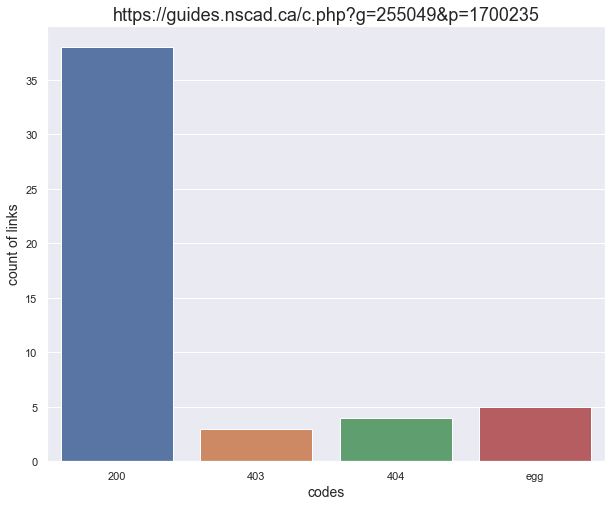

In [21]:
#create a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x="codes", 
    y="links",
    data=data,
    ci=None )
plt.ylabel("count of links", size=14)
plt.xlabel("codes", size=14)
plt.title(url, size=18)
plt.savefig("url.png", dpi=150)